In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as tdel
from matplotlib.dates import DateFormatter
import pathlib

In [3]:
from sklearn import svm

In [4]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rcParams['svg.fonttype'] = 'none'
# rc('text', usetex=True)

In [5]:
outdir = "output"

### CT Imaging Set-up

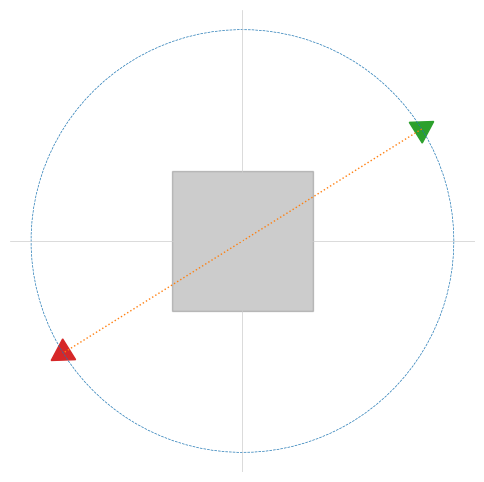

In [58]:
theta = np.linspace(0, 2*np.pi, 100)
r = 3
obj_region = np.array([[-1, 1, 1, -1, -1],
                       [-1, -1, 1, 1, -1]])
# x-ray source and detector template
src_sz = 0.2
src_theta = np.array([0, 2 * np.pi / 3, -2 * np.pi / 3, 0])
srcdet_template = src_sz * np.array([np.cos(src_theta), np.sin(src_theta)])

# x-ray source
rotmat = lambda x : np.array([[np.cos(x), -np.sin(x)],
                              [np.sin(x), np.cos(x)]])
phi = 32 * np.pi / 180
# Displace and Rotate for the source.
src = rotmat(phi) @ (srcdet_template + np.array([[r], [0]]))
# Displace and Rotate for the detector.
det = rotmat(np.pi + phi) @ (srcdet_template + np.array([[r], [0]]))
# x-ray beam limits
ray = np.hstack((rotmat(phi) @ np.array([[r], [0]]),
                 rotmat(np.pi + phi) @ np.array([[r], [0]])))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
# Sqaure region of interest
ax.fill(obj_region[0, :], obj_region[1, :], color='k', alpha=0.2)
# Circular track of the x-ray source and detector
ax.plot(r * np.cos(theta), r * np.sin(theta), lw=0.5,
        ls='dashed', color='tab:blue')
# X-ray source
# ax.plot(src[0, :], src[1, :], lw=1, color='tab:green')
ax.fill(src[0, :], src[1, :], color='tab:green')
# ax.plot(det[0, :], det[1, :], lw=1, color='tab:red')
ax.fill(det[0, :], det[1, :], color='tab:red')
# X-ray beam
ax.plot(ray[0, :], ray[1, :], lw=1, ls="dotted",
        color='tab:orange')

# Axis lines
ax.axhline(0, lw=0.5, color='0.8')
ax.axvline(0, lw=0.5, color='0.8')

ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.axis('equal');

# Save the figure
fig.savefig(f"{outdir}/ct_setup.svg", bbox_inches='tight')